

# preprocessing data
- to create dummy variables we can use scikit-learn OneHotEncoder or pandas get_dummies()
- handle missing data

In [12]:
import pandas as pd
dataset = "datasets/music_clean.csv"
music_df = pd.read_csv(dataset)

# this shows any missing data
music_df.isna().sum().sort_values()

# to remove missing data
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

music_df.isna().sum().sort_values()

# another way is to impute the values by using the mean or the median or the non-missing values, and for categorical values we can use the most frequent value
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# instantiate imputer
imputer = SimpleImputer()

# instantiate knn model
knn = KNeighborsClassifier(n_neighbors=3)

# build steps for the pipeline
steps = [("imputer", imputer),
         ("knn", knn)]

# create pipeline
pipeline = Pipeline(steps)

# fit the pipeline
pipeline.fit(X_train, y_train)

# make predictions
y_pred = pipeline.predict(X_test)


Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

## centering and scaling

In [13]:
import pandas as pd
dataset = "datasets/music_clean.csv"
music_df = pd.read_csv(dataset)

music_df[["duration_ms", "loudness", "speechiness"]].describe(())

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
50%,2.163000e+05,-6.855000,0.043600
max,1.617333e+06,-0.883000,0.710000


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# import the dataset
dataset = "datasets/music_clean.csv"
music_df = pd.read_csv(dataset)

# create our features and target arrays
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate standardscaler object
scaler = StandardScaler()

# pass the training dataset to the scaler fit_transform
X_train_scaled = scaler.fit_transform(X_train)

# pass the test dataset to the scaler transform
X_test_scaled = scaler.fit(X_test)

print("Original Data:")
print(f"Mean: {np.mean(X)}, STD: {np.std(X)}")
print("\nScaled Data:")
print(f"Mean: {np.mean(X_train_scaled)}, STD: {np.std(X_train_scaled)}")

Original Data:
Mean: 20666.582585618085, STD: 68890.98734103922

Scaled Data:
Mean: 3.5971225997855074e-16, STD: 0.9999999999999996


## Evaluating multiple models

C:\Users\Murti\AppData\Local\Temp\ipykernel_9156\873619598.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


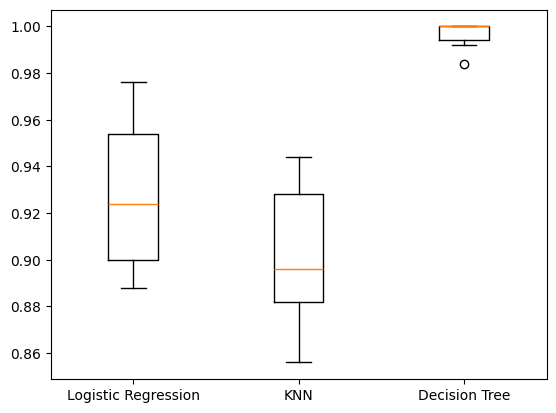

Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Test Set Accuracy: 1.0


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# read the dataset
dataset = "datasets/music_clean.csv"
music_df = pd.read_csv(dataset)

# get the features and the target
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# initialize scaler
scaler = StandardScaler()

# perform scaler on train and test dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a dictionary with models names
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

# create a list to store the results
results = []

# looping through the models
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

# plotting the results
plt.boxplot(results, labels=models.keys())
plt.show()

# looping through the models to check the accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Test Set Accuracy: {test_score}")